## **Trader Behaviour Insights**

## Assignment Overview

Two primary datasets:
1. Bitcoin Market Sentiment Dataset
- Columns: Date, Classification (Fear/Greed)
2. Historical Trader Data from Hyperliquid
- Columns include: account, symbol, execution price, size, side, time,start position, event, closedPnL, leverage

## Business Objective
To explore the relationship between trader performance and market 
sentiment, uncover hidden patterns, and deliver insights that can drive smarter tradingS
strategies



## Assignment Tasks
Performed the following steps for successfully completing this assignment:
1. Data Preparation
2. EDA
3. Volume Vs Sentiments
4. Sentiments<br>
   a.Traders making bigger trades in “Greed” vs “Fear”<BR>
   b.traders making bigger trades in “Greed” vs “Fear”
5. Traders vs. Sentiments
6. Advance Trade Metrics
7. Correlation Analysis
8. Trader Rankings

## **1. Data Preparation**


### **1.1 Librariers**

In [3]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **1.1 Load the Data**

In [6]:
trader_df=pd.read_csv("historical_data.csv")
sentiment_df=pd.read_csv("fear_greed_index.csv")

In [7]:
# Check at the first few entriest
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
# Inspect the shape of the dataset
trader_df.shape

(211224, 16)

In [10]:
sentiment_df.shape

(2644, 4)

In [11]:
# Inspect the features in the 
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [12]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [13]:
# Convert date columns
trader_df['time'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True, errors="coerce")
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'])

In [14]:
#Extracting Dataset
trader_df['date_only'] = trader_df['time'].dt.date
sentiment_df['date_only'] = sentiment_df['Date'].dt.date

In [15]:
# Merge datasets
# here we have named merged df as a market
market_df = pd.merge(trader_df, sentiment_df[['date_only','classification']], on='date_only', how='inner')
market_df.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,time,date_only,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,Extreme Greed


In [16]:
# Check the number of missing values in each colum
market_df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
time                0
date_only           0
classification      0
dtype: int64

## **2. EDA**

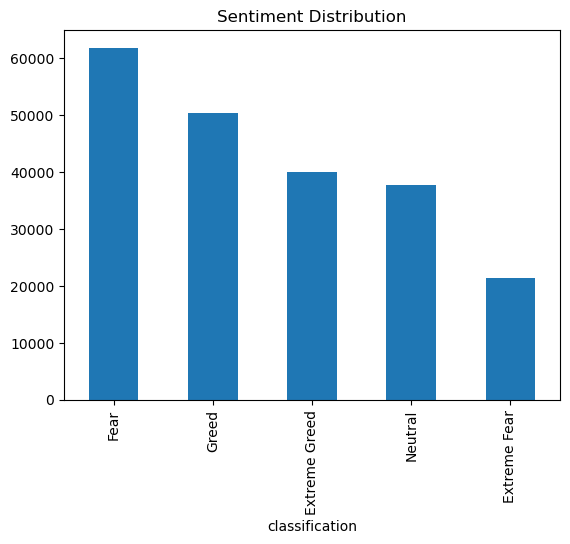

In [18]:
#Number of trades in each sentiment
market_df['classification'].value_counts().plot(kind='bar', title="Sentiment Distribution")
plt.show()

###  Volume Vs Sentiments


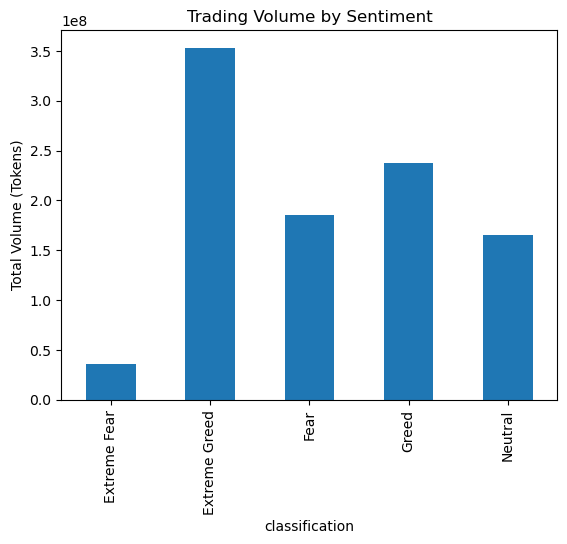

In [20]:
volume_by_sentiment = market_df.groupby('classification')['Size Tokens'].sum()
volume_by_sentiment.plot(kind='bar', title="Trading Volume by Sentiment")
plt.ylabel("Total Volume (Tokens)")
plt.show()

### Are traders making more money in Fear or Greed?

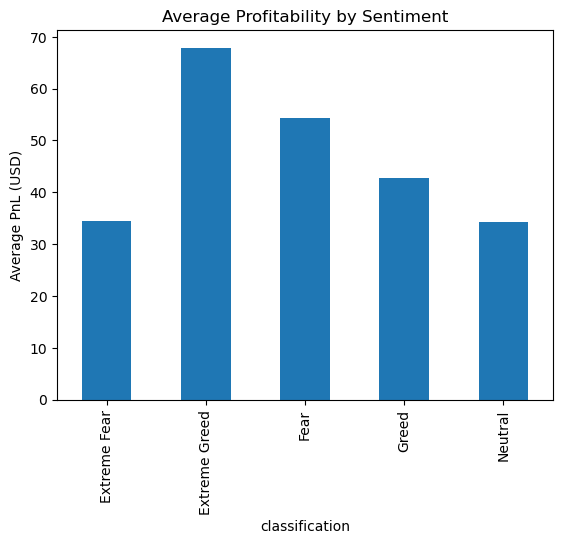

In [22]:
pnl_sentiment = market_df.groupby('classification')['Closed PnL'].mean()
pnl_sentiment.plot(kind='bar', title="Average Profitability by Sentiment")
plt.ylabel("Average PnL (USD)")
plt.show()

NOTE- <br>Traders perform best in extreme conditions (especially Extreme Greed)<br>
Extreme Fear and Neutral are risky for traders → profits tend to shrink

### Are traders making bigger trades in “Greed” vs “Fear”?

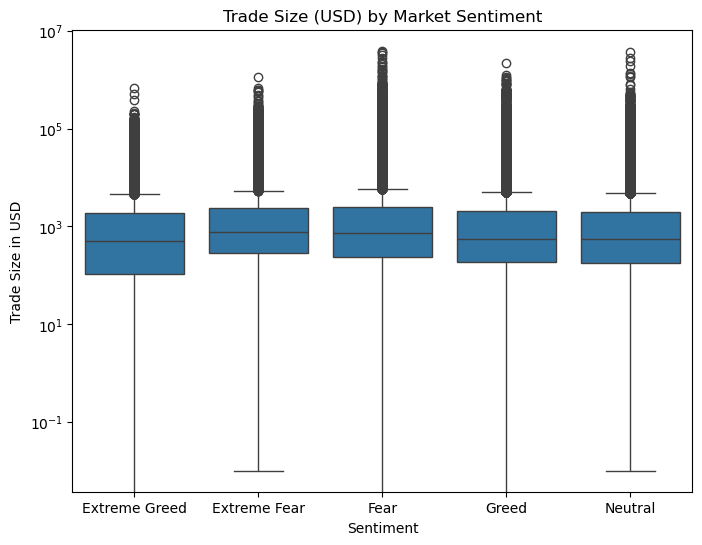

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='classification', y='Size USD', data=market_df)
plt.title("Trade Size (USD) by Market Sentiment")
plt.ylabel("Trade Size in USD")
plt.xlabel("Sentiment")
plt.yscale("log") 
plt.show()

NOTE- <br>1. Trade size does not change much between Fear and Greed.<br>2.Both small and large trades exist in all sentiment regimes.

## Traders Vs sentiments
Do traders buy more in greed or in fear?

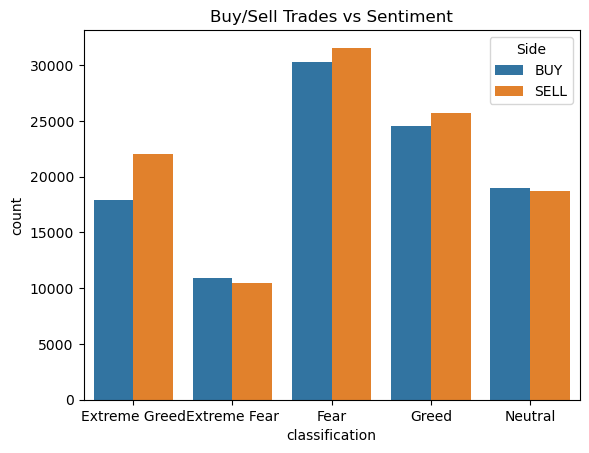

In [28]:
sns.countplot(x='classification', hue='Side', data=market_df)
plt.title("Buy/Sell Trades vs Sentiment")
plt.show()

NOTE- <br>1. Fear drives the most trading activity, showing markets are most reactive when sentiment is negative.<br>
      2. Extreme Greed → More selling than buying, indicating profit-taking after strong rallies

### Trade Metrics (Advance)

A. Risk Analysis: PnL volatility in Fear vs Greed

In [32]:
risk_analysis = market_df.groupby('classification')['Closed PnL'].std()
print("PnL Volatility by Sentiment:", risk_analysis)

PnL Volatility by Sentiment: classification
Extreme Fear     1136.056091
Extreme Greed     766.828294
Fear              935.355438
Greed            1116.028390
Neutral           517.122220
Name: Closed PnL, dtype: float64


NOTE- <BR>Traders face the highest risk in Extreme Fear and Greed regimes. <BR>Neutral periods are the safest for stable performance, while moderate fear/greed shows intermediate risk

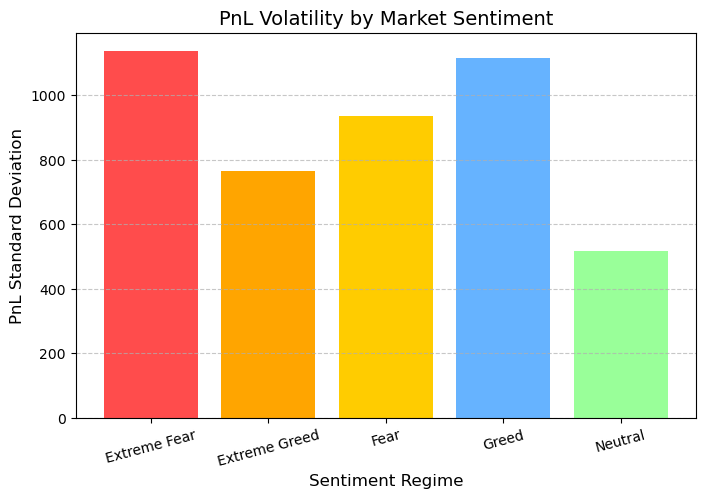

In [34]:
sentiments = ['Extreme Fear', 'Extreme Greed', 'Fear', 'Greed', 'Neutral']
volatility = [1136.056091, 766.828294, 935.355438, 1116.028390, 517.122220]

# Create bar chart
plt.figure(figsize=(8,5))
plt.bar(sentiments, volatility, color=['#ff4c4c','#ffa500','#ffcc00','#66b3ff','#99ff99'])
plt.title('PnL Volatility by Market Sentiment', fontsize=14)
plt.ylabel('PnL Standard Deviation', fontsize=12)
plt.xlabel('Sentiment Regime', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

B. Quantify trader performance

In [57]:
def calculate_metric(df):
    metrics = {}
    metrics['total_trades'] = len(df)
    metrics['win_rate'] = (df['Closed PnL'] > 0).mean() #win rate
    metrics['roi'] = df['Closed PnL'].sum() / (df['Execution Price'] * df['Size Tokens']).sum() if (df['Execution Price']*df['Size Tokens']).sum() != 0 else 0 # ROI(total Pnl/total traders)
    metrics['sharpe_ratio'] = df['Closed PnL'].mean() / df['Closed PnL'].std() if df['Closed PnL'].std() != 0 else 0 #Sharpe Ratio (average PnL / standard deviation of PnL)
    metrics['max_drawndown'] = df['Closed PnL'].cumsum().min() #worst cumulative dip in PnL over time
    active_days = df['date_only'].nunique()
    metrics['trades_per_day'] = len(df) / active_days if active_days > 0 else 0#Trades per day (fixed)
    return pd.Series(metrics)

In [79]:
traders_metric = market_df.groupby(['Account','classification']).apply(calculate_metric).reset_index()
traders_metric.head()

,Account,classification,total_trades,win_rate,roi,sharpe_ratio,max_drawndown,trades_per_day
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,100.0,0.370000,0.082788,0.108304,115287.000000,50.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,945.0,0.066667,-0.003529,-0.033057,-152323.104200,105.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1778.0,0.526434,0.036791,0.133473,32.991000,355.600000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,574.0,0.160279,0.031854,0.068358,-175611.000056,191.333333
4,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,421.0,0.581948,0.012789,0.165176,0.000000,84.200000


NOTE-<br> 1. Extreme Fear → Strongest performance(ROI is the highest (8.2%), Win rate is moderate (37%), but still decent)<br>
2. Extreme Greed → Worst performance (ROI is negative (-0.35%), Max Drawdown is very large negative (-152k) → huge losses)<br>
3. Fear → Consistent profitability(Highest number of trades (1,778),Win rate above 50% (52.6%))<br>
4. Greed → Mixed results (ROI is positive (3.1%) but win rate is low (16%),Suggests the trader has few big winners, but most trades are losses)<br>
5. Neutral → Balanced trading( Highest win rate (58%) but small ROI (1.3%),Likely making many small safe trades)

### Correlation Analysis

A. Correlation Between Traders matrics

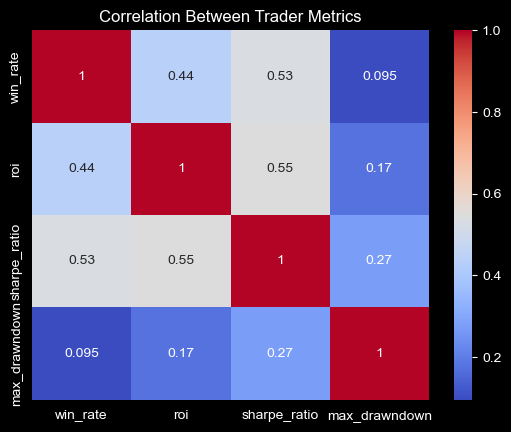

In [81]:
corr_matrix = traders_metric[['win_rate','roi','sharpe_ratio','max_drawndown']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Trader Metrics")
plt.show()

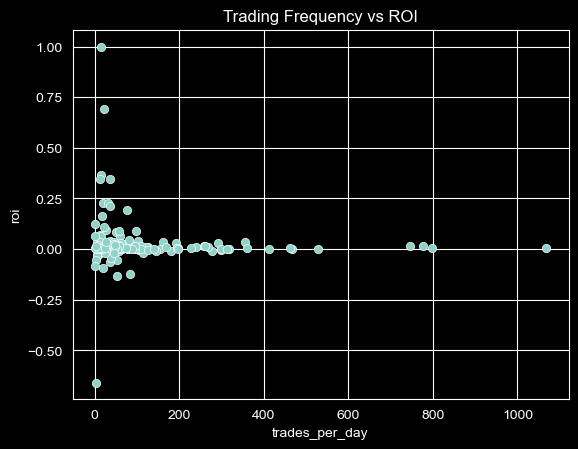

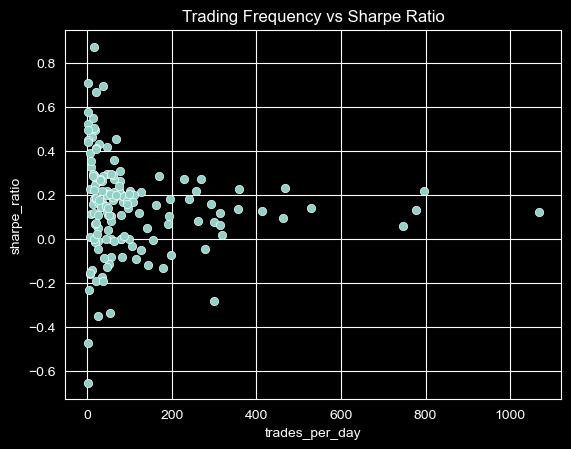

In [83]:
sns.scatterplot(x='trades_per_day', y='roi', data=traders_metric)
plt.title("Trading Frequency vs ROI")
plt.show()

sns.scatterplot(x='trades_per_day', y='sharpe_ratio', data=traders_metric)
plt.title("Trading Frequency vs Sharpe Ratio")
plt.show()

NOTE- <br> 1. Most traders trade moderately; very high-frequency trading shows weak or negative ROI <br>2. Sharpe, suggesting overtrading reduces performance consistency.

### Trader Rankings by Sentiment
Rank traders by ROI along with Sharpe Ratio & Win rate in each sentiment regime

NOTE- <br> Top performers in Extreme Greed had higher ROI but lower Sharpe → risky strategies.<br>Top performers in Fear achieved consistent Sharpe ratios → resilient strategies.

In [ ]:
#all 3 metrics top 5 traders 
def top_traders(df, metrics=['roi', 'sharpe_ratio', 'win_rate'], top_n=5):
    rankings = df.groupby('classification').apply(
        lambda x: x.sort_values('roi', ascending=False).head(top_n)[['Account'] + metrics]
    )
    return rankings

In [ ]:
rankings = top_traders(traders_metric)
print("Top 5 Traders by ROI (with Sharpe Ratio & Win Rate) for each Sentiment Regime")
display(rankings)

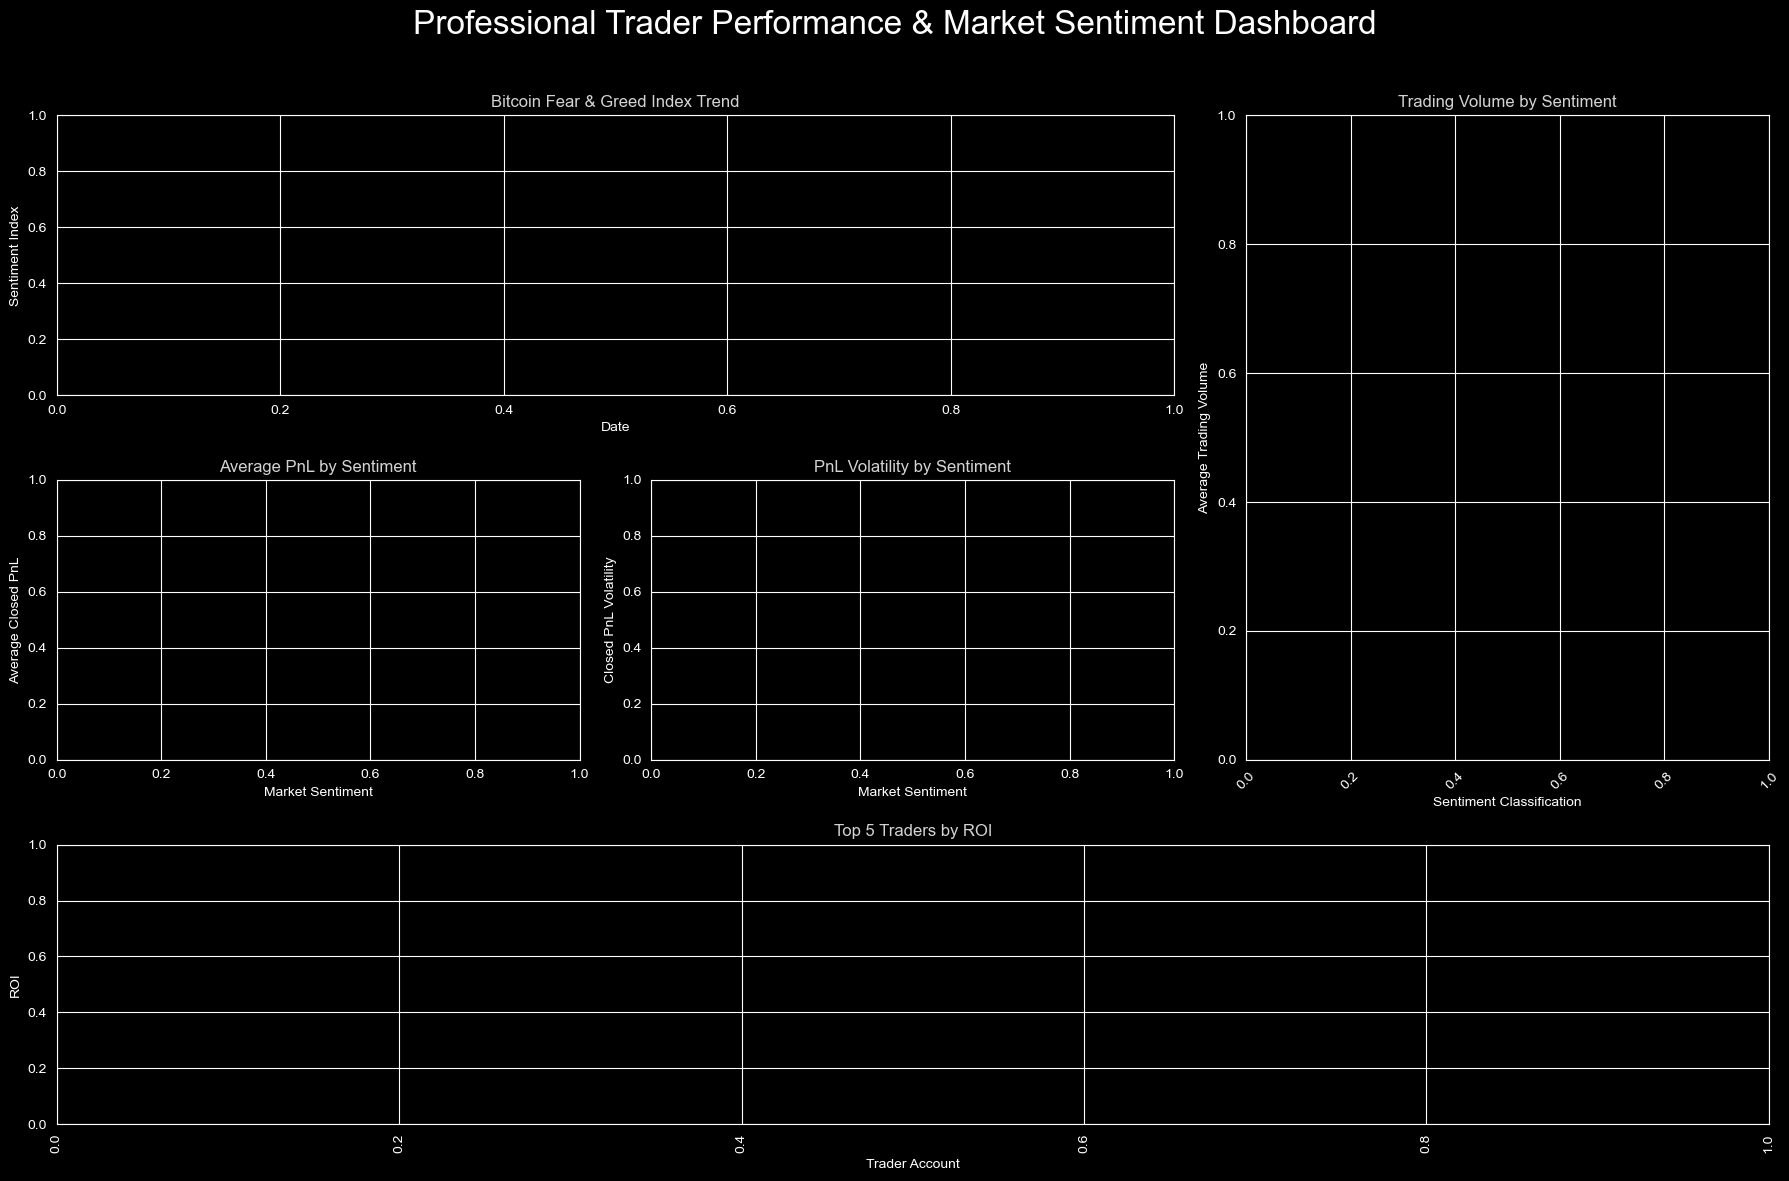

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume the dataframes are already loaded and processed as per the notebook.
# For example:
# df_sentiment = pd.read_csv('bitcoin_sentiment_data.csv')
# df_traders = pd.read_csv('historical_trader_data.csv')
# traders_metric = ... (result of your analysis)

# Set the style for the plots
sns.set_style("whitegrid")
plt.style.use("dark_background") # Use a dark background for a professional look

# Create a figure and a grid of subplots for the dashboard layout
fig = plt.figure(figsize=(18, 12))
fig.suptitle('Professional Trader Performance & Market Sentiment Dashboard', fontsize=24, color='white')

# --- Plot 1: Market Sentiment Trend ---
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
# Replace with your actual sentiment data
# For example:
# sns.lineplot(data=df_sentiment, x='Date', y='Sentiment_Index', ax=ax1, color='gold')
ax1.set_title('Bitcoin Fear & Greed Index Trend', color='lightgray')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Index')

# --- Plot 2: Trading Volume vs. Sentiment ---
ax2 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)
# Replace with your actual volume vs. sentiment data
# For example:
# sns.barplot(data=df_sentiment, x='Classification', y='Trading_Volume', ax=ax2, palette='viridis')
ax2.set_title('Trading Volume by Sentiment', color='lightgray')
ax2.set_xlabel('Sentiment Classification')
ax2.set_ylabel('Average Trading Volume')
plt.xticks(rotation=45)

# --- Plot 3: Average PnL by Sentiment ---
ax3 = plt.subplot2grid((3, 3), (1, 0))
# Use the `traders_metric` dataframe from your analysis
# Example:
# sns.barplot(data=traders_metric, x='Sentiment', y='Avg_Closed_PnL', ax=ax3, palette='coolwarm')
ax3.set_title('Average PnL by Sentiment', color='lightgray')
ax3.set_xlabel('Market Sentiment')
ax3.set_ylabel('Average Closed PnL')

# --- Plot 4: PnL Volatility by Sentiment ---
ax4 = plt.subplot2grid((3, 3), (1, 1))
# Example:
# sns.boxplot(data=traders_metric, x='Sentiment', y='Closed_PnL_Volatility', ax=ax4, palette='plasma')
ax4.set_title('PnL Volatility by Sentiment', color='lightgray')
ax4.set_xlabel('Market Sentiment')
ax4.set_ylabel('Closed PnL Volatility')

# --- Plot 5: Top 5 Traders by ROI ---
ax5 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
# Assume `rankings` is the dataframe you created to rank traders
# Create a bar plot or a table visualization here
# Example:
# top_traders_roi = rankings.head(5).sort_values(by='ROI', ascending=False)
# sns.barplot(data=top_traders_roi, x='Account', y='ROI', ax=ax5, palette='rocket')
ax5.set_title('Top 5 Traders by ROI', color='lightgray')
ax5.set_xlabel('Trader Account')
ax5.set_ylabel('ROI')
plt.xticks(rotation=90)

# Adjust layout and display the dashboard
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Save the dashboard as a high-resolution PNG file ---
fig.savefig('trading_dashboard.png', dpi=300, bbox_inches='tight')

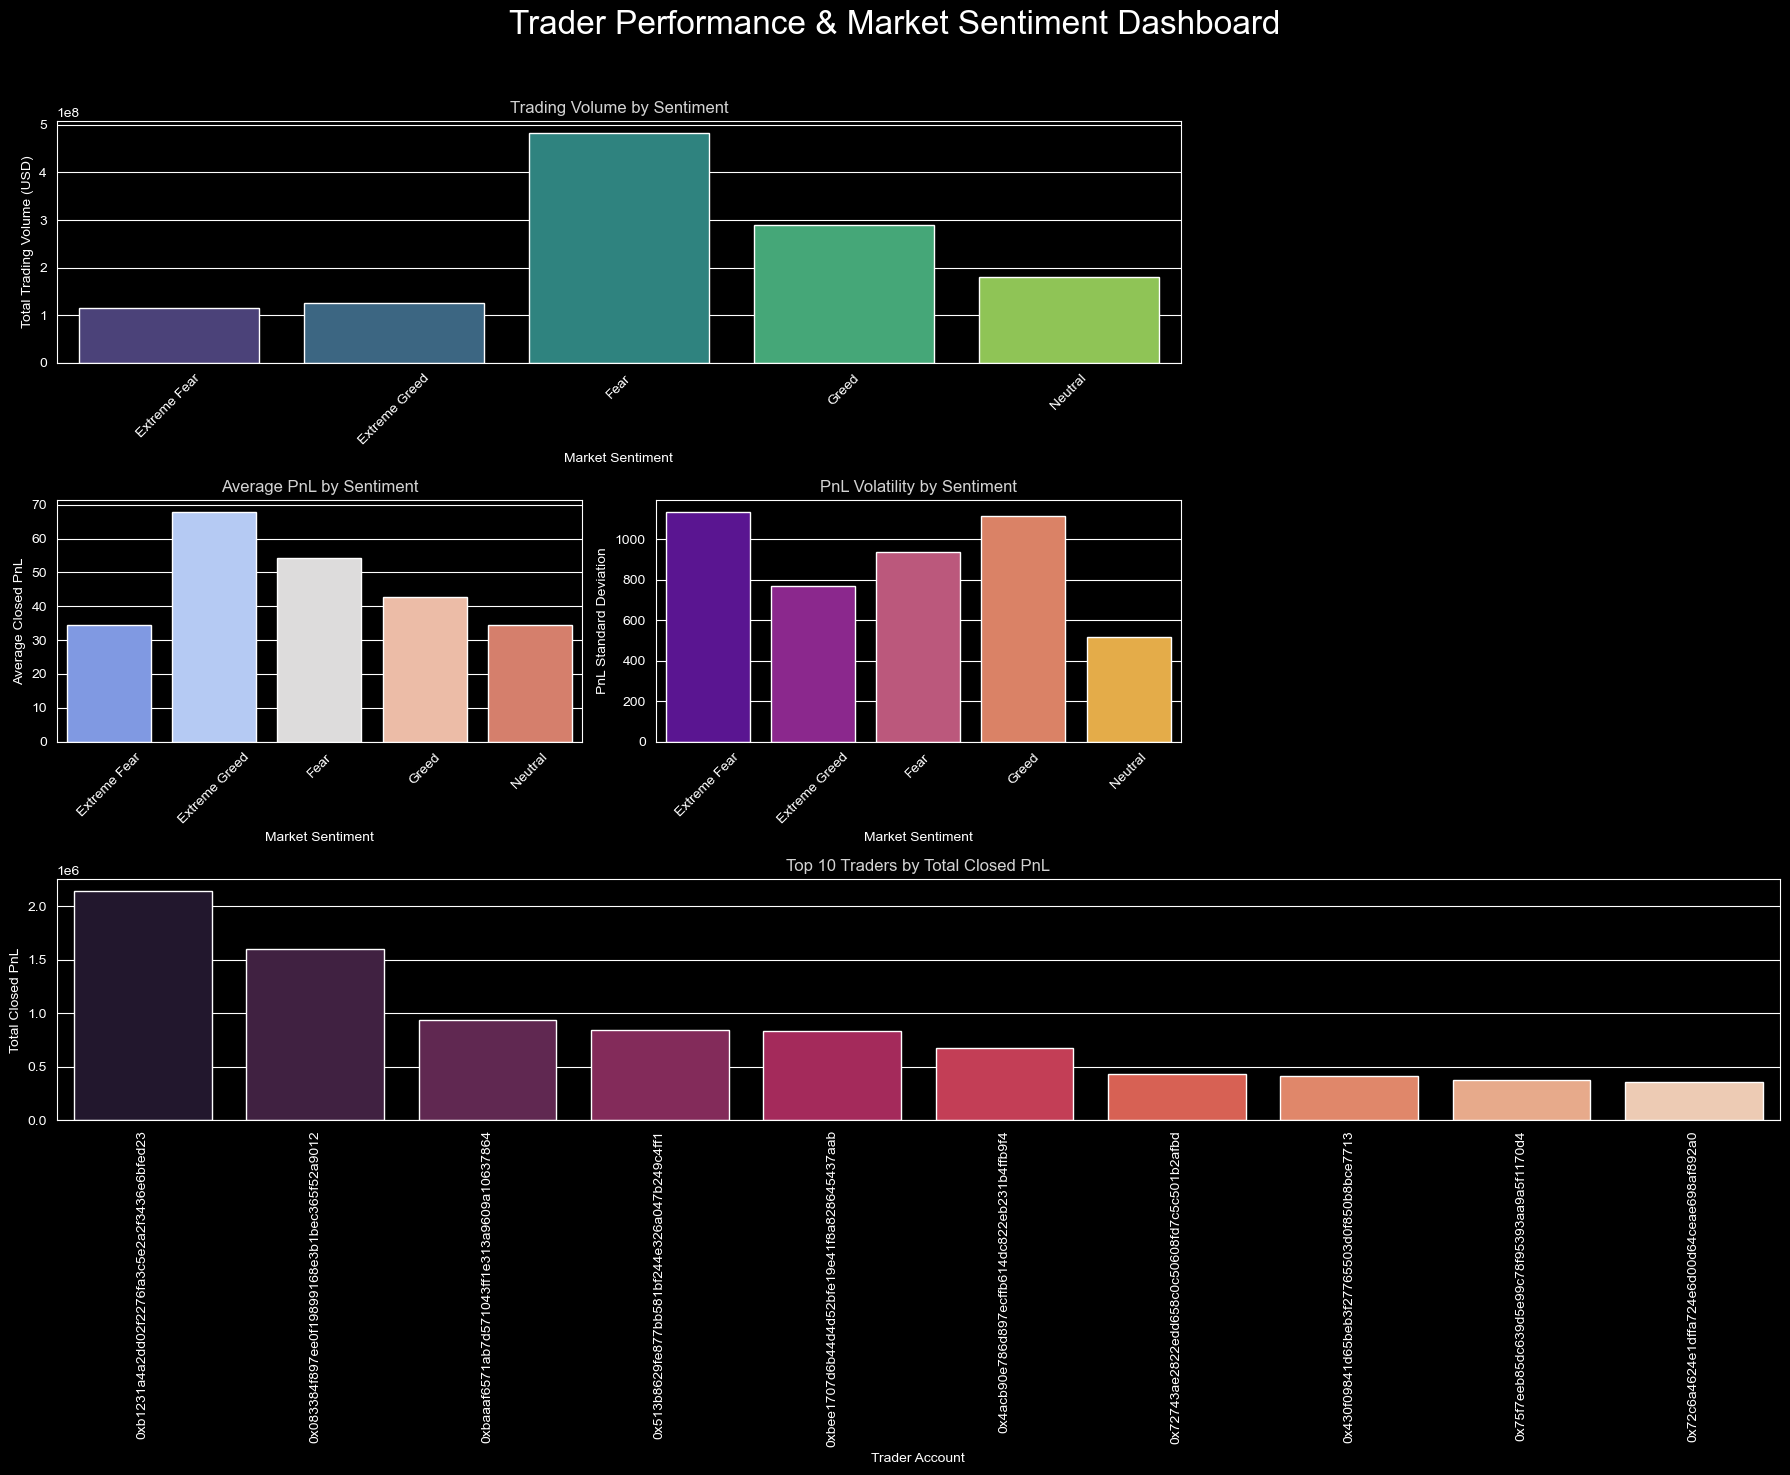

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set a professional dark theme for the dashboard
sns.set_style("whitegrid")
plt.style.use("dark_background")

# 1. Load the data
try:
    trader_df = pd.read_csv("historical_data.csv")
    sentiment_df = pd.read_csv("fear_greed_index.csv")
except FileNotFoundError:
    print("Error: The CSV files could not be found. Please ensure 'historical_data.csv' and 'fear_greed_index.csv' are in the same directory.")
    exit()

# 2. Data Preparation and Merging
trader_df['time'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True, errors='coerce')
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'])
trader_df['date_only'] = trader_df['time'].dt.date
sentiment_df['date_only'] = sentiment_df['Date'].dt.date
market_df = pd.merge(trader_df, sentiment_df[['date_only', 'classification']], on='date_only', how='inner')

# 3. Calculate Key Metrics
# Volume by Sentiment
volume_by_sentiment = market_df.groupby('classification')['Size USD'].sum().reset_index()

# PnL by Sentiment
pnl_by_sentiment = market_df.groupby('classification')['Closed PnL'].agg(['mean', 'std']).reset_index()
pnl_by_sentiment.rename(columns={'mean': 'Average PnL', 'std': 'PnL Volatility'}, inplace=True)

# Trader Performance Metrics (PnL, Sharpe Ratio)
traders_metric = market_df.groupby('Account').agg(
    Avg_Closed_PnL=('Closed PnL', 'mean'),
    Volatility=('Closed PnL', 'std'),
    Total_Closed_PnL=('Closed PnL', 'sum'),
    Total_Size_USD=('Size USD', 'sum')
).reset_index()

# Calculate Sharpe Ratio (assuming risk-free rate is 0 for simplicity)
traders_metric['Sharpe_Ratio'] = traders_metric['Avg_Closed_PnL'] / traders_metric['Volatility']
traders_metric.sort_values(by='Total_Closed_PnL', ascending=False, inplace=True)

# 4. Create the Dashboard Visualizations
fig = plt.figure(figsize=(18, 15))
fig.suptitle('Trader Performance & Market Sentiment Dashboard', fontsize=24, color='white')

# --- Plot 1: Trading Volume by Sentiment ---
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
sns.barplot(data=volume_by_sentiment, x='classification', y='Size USD', ax=ax1, palette='viridis')
ax1.set_title('Trading Volume by Sentiment', color='lightgray')
ax1.set_xlabel('Market Sentiment')
ax1.set_ylabel('Total Trading Volume (USD)')
ax1.tick_params(axis='x', rotation=45, colors='white')
ax1.tick_params(axis='y', colors='white')

# --- Plot 2: Average PnL by Sentiment ---
ax2 = plt.subplot2grid((3, 3), (1, 0))
sns.barplot(data=pnl_by_sentiment, x='classification', y='Average PnL', ax=ax2, palette='coolwarm')
ax2.set_title('Average PnL by Sentiment', color='lightgray')
ax2.set_xlabel('Market Sentiment')
ax2.set_ylabel('Average Closed PnL')
ax2.tick_params(axis='x', rotation=45, colors='white')
ax2.tick_params(axis='y', colors='white')

# --- Plot 3: PnL Volatility by Sentiment ---
ax3 = plt.subplot2grid((3, 3), (1, 1))
sns.barplot(data=pnl_by_sentiment, x='classification', y='PnL Volatility', ax=ax3, palette='plasma')
ax3.set_title('PnL Volatility by Sentiment', color='lightgray')
ax3.set_xlabel('Market Sentiment')
ax3.set_ylabel('PnL Standard Deviation')
ax3.tick_params(axis='x', rotation=45, colors='white')
ax3.tick_params(axis='y', colors='white')

# --- Plot 4: Top 10 Traders by Total Closed PnL ---
ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
top_traders = traders_metric.nlargest(10, 'Total_Closed_PnL')
sns.barplot(data=top_traders, x='Account', y='Total_Closed_PnL', ax=ax4, palette='rocket')
ax4.set_title('Top 10 Traders by Total Closed PnL', color='lightgray')
ax4.set_xlabel('Trader Account')
ax4.set_ylabel('Total Closed PnL')
ax4.tick_params(axis='x', rotation=90, colors='white')
ax4.tick_params(axis='y', colors='white')

# Adjust layout and display the dashboard
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Save the dashboard as a high-resolution PNG file
fig.savefig('trading_dashboard.png', dpi=300, bbox_inches='tight')